In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/home/pawel1/Pulpit/Astrophysics/CTA/cta-lstchain')
       
from lstchain.io.lsteventsource import LSTEventSource
from r0 import LSTR0Corrections

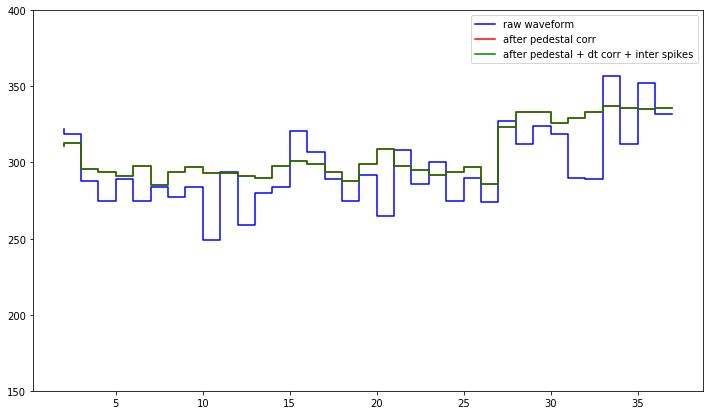

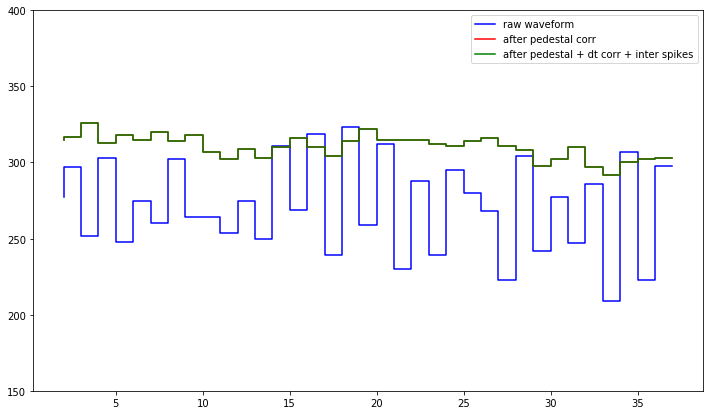

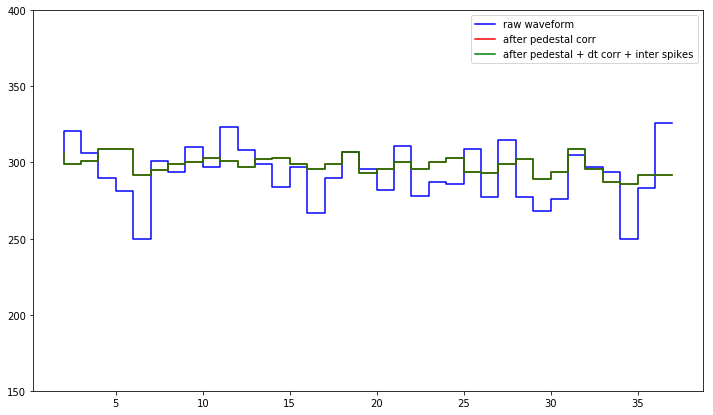

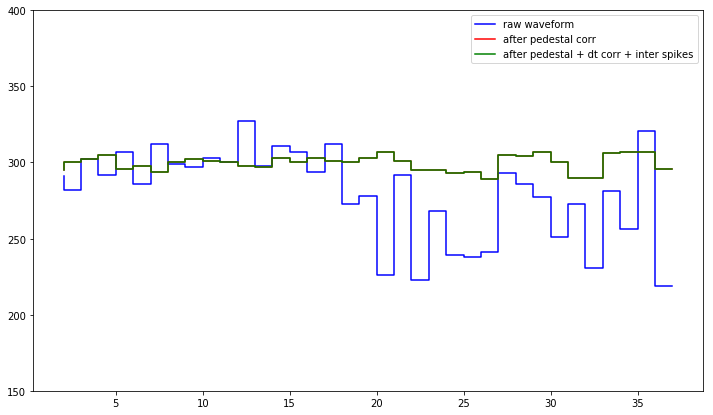

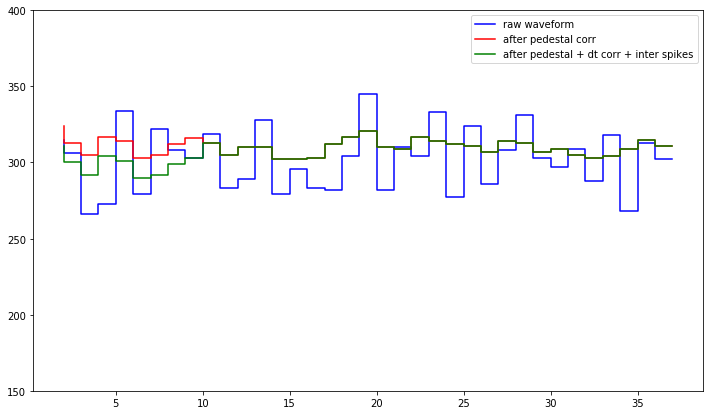

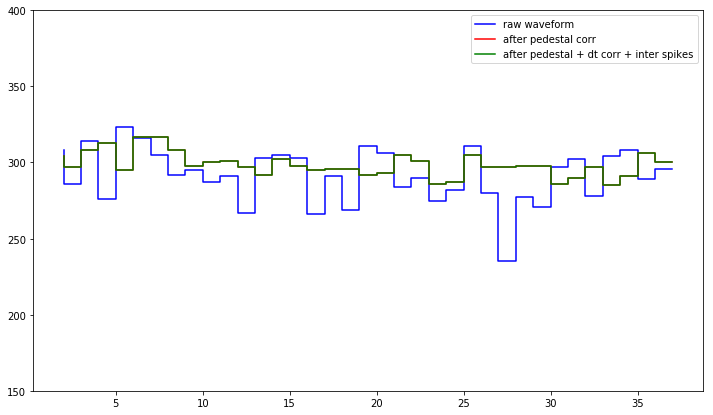

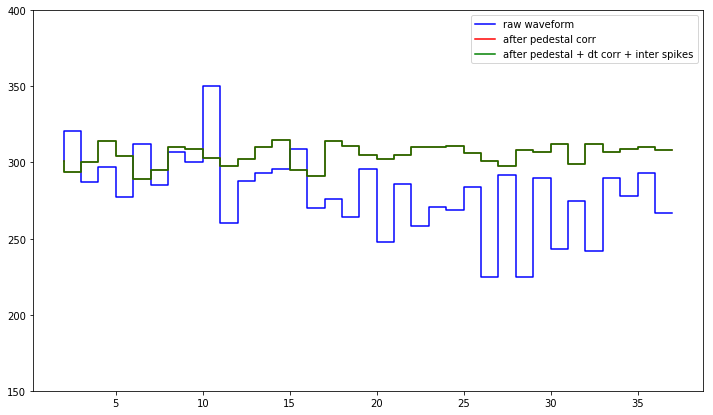

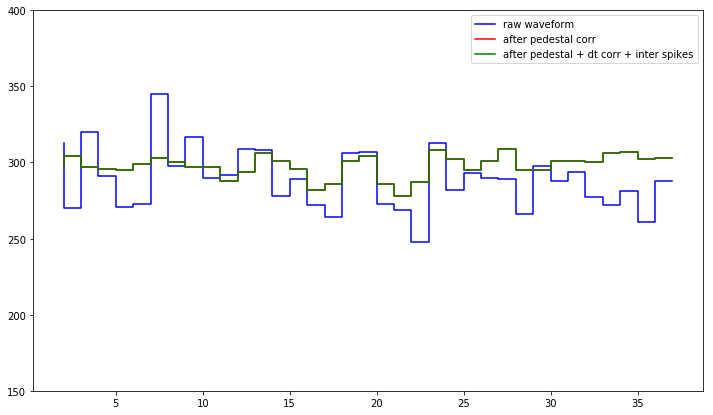

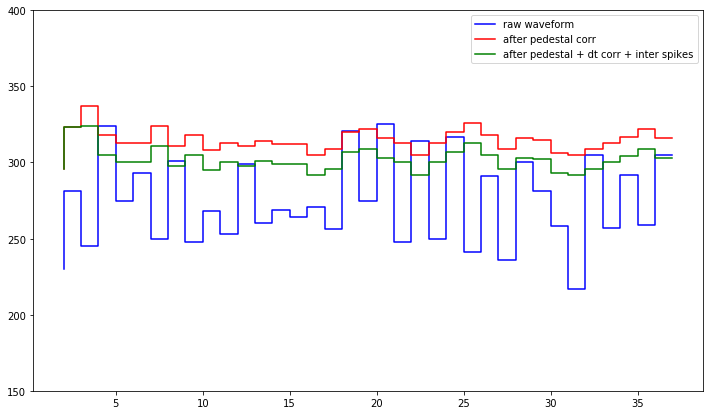

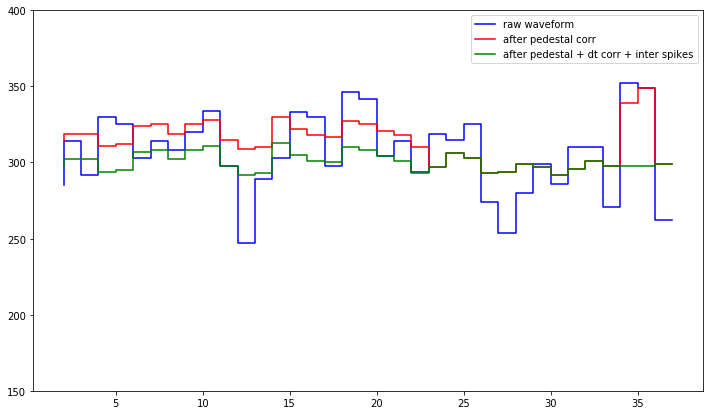

In [4]:
reader = LSTEventSource(input_url="/media/pawel1/ADATA HD330/20190215/LST-1.*.Run00097.0001.fits.fz",
                        max_events=10)

lst_r0 = LSTR0Corrections(pedestal_path="pedestal97.fits", offset=300)      
t = np.linspace(2, 37, 36)

for ev in reader:
    plt.figure(figsize=(12, 7))
    plt.step(t,  ev.r0.tel[0].waveform[0, 7, 2:38], color="blue", label="raw waveform")
    
    lst_r0.subtract_pedestal(ev)
    
    plt.step(t,  ev.r0.tel[0].waveform[0, 7, 2:38], color="red", label="after pedestal corr")
    
    lst_r0.time_lapse_corr(ev)
    lst_r0.interpolate_spikes(ev)
    
    plt.step(t,  ev.r0.tel[0].waveform[0, 7, 2:38], color="green", label="after pedestal + dt corr + inter spikes")
    
    plt.legend()
    plt.ylim([150, 400])
    plt.show()